## Which type of flower is it? 
The goal for this assignment to is to classify different flowers species from a dataset(insert link) using a CNN network. Since we need to be smart in saving computing power to run on my own machine i am implementing transfer learning. The dataset we are using is fairly balanced. 
My solution will be inspired by AlexNet structure. However the goal is making a much smaller (if possible) variant on this. 

I will investigate and design the AlexNet but as an dilutad convulutation to save computation and memory speed. I am thinking of to might do the dilutation just in the beginning (since it acts as segmentation of shapes that i want to pass through the layer as early as possible to fast learn the kontur). I hope it will catch the pictures where it is over "fields" of flowers and can easier identiyfy these things   

* Dilated Convolutional Layers Early On:
Use dilated convolutions in the initial layers of the network. This helps in capturing a broader context and larger receptive fields without significantly increasing the number of parameters. It can be particularly useful for understanding global structures in the input data.
* Pooling Layers Later On:
As the network progresses, introduce pooling layers to downsample the spatial dimensions. This reduces the computational load and allows the network to focus on the most important features, helping to create a more abstract and condensed representation.


We want to do feature extraction due to small dataset to try to transfer the learning to hopefully get a better result
We can import using tf.keras.applications another ML model (check documentation)

# Step 1 Dataset. (Before and after images of dataset)
Removed some images that where not even pictures of the flowers and some pictures whre the same in both maps...
This is important since we are not working with a huge dataset and every picture needs to be good quality (altough i am not removing pictures that can be challenging, that is something else, only where it was plain wrong that it wasn't pictures of flowers or wrong flowers sort. ). My philosophy is: If me as a human can't classify each image (trying to remind myself that each image is unique, and i have prior information what it is), i am not expecting my network to learn it either. Removed images where there are multiple flowers types overlapping, removed pictures that are too far away, removed pictures where the flower hasn't fully developed or withered flowers

Dandelion can be challenging because it is essentaltity two classes into one (since the flower changes so much) and it is slightly skewed since there is more pictures on when its not blooming than yello ones. There was some mixed images as well for instance a daisy in dandelion folder

## Dataset size before:
* daisy = 764
* dandelion = 1051
* rose = 784
* sunflower = 733
* tulip = 984 

## Dataset size after:
* daisy = 742
* dandelion = 1016
* rose = 759
* sunflower = 694
* tulip = 853

Total images removed = 252

* inte fanns någon blomma i
* blommor som var av fel sort i fel mapp
* blommor som var otroligt inzoomade
* blommor som speglades genom något
* blommor som var bilder på målade blommor (behöll några riktigt realistiska)
* bilder tagna från alldeles för långt ifrån där jag som människa inte kan se vad det är (tulpanerna kan man ju gissa men det är ju för jag sitter med kunskap att det är ett tulpanfält innan, så tog bort dem)
* bilder med flera olika sorters blommor i samma bild
* vissna blommor



TODO: Maybe add a Negative Dataset 

In [1]:
# Roadmap
# TODO: Go through the each datasets and remove the images that are bad. Doccument this
# TODO: Read in images (Pillow? OpenCV)
    # class preprocessing (Would be cool)
        # __init__()
        # def process_images
            # - resize images (227x227) was 320x240 (no uniform proportion)
        # def split_dataset

# TODO: Resize the images to ensure all images are the same size in a function
# TODO: Create labels for each class (5)
# TODO: Divide them into train and test split (random seed) 
# TODO: Load in the model that will be used
    # def build_model   
# TODO: Create the different layers (pooling, how many layers)
    # rembembert that it is rgb images so it has to be 3D deep for instance 32x32x3
# TODO: --> Output is 5 classes (neurons) in the last layer
# TODO: Implement transfer learning for the model 
# TODO: Train and evalutate the model
# TODO: Fine-tuning hyperparameters?
# TODO: Visualize the training and results




In [14]:
# Importing relevant packages
import numpy as np
import matplotlib.pyplot as plt
import PIL
from pathlib import Path
import pandas as pd
# %load_ext tensorboard

import os
import visualkeras

from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard


import tensorflow as tf
from keras.optimizers import Adam

from keras.models import Sequential # This is used to initialize the neural network TODO: Double check
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D, Activation # This is used to build the layers of the neural network


Found 4064 files belonging to 5 classes.
Using 3252 files for training.
Found 4064 files belonging to 5 classes.
Using 812 files for validation.
After splitting test_split contains: 3 objects (400 images) for test
After splitting val_split contains: 3 objects (400 images) for validation
Classes in the dataset are: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Dimensions for each image batch is: (128, 227, 227, 3)
Label batch size corresponding to each object: (128,)


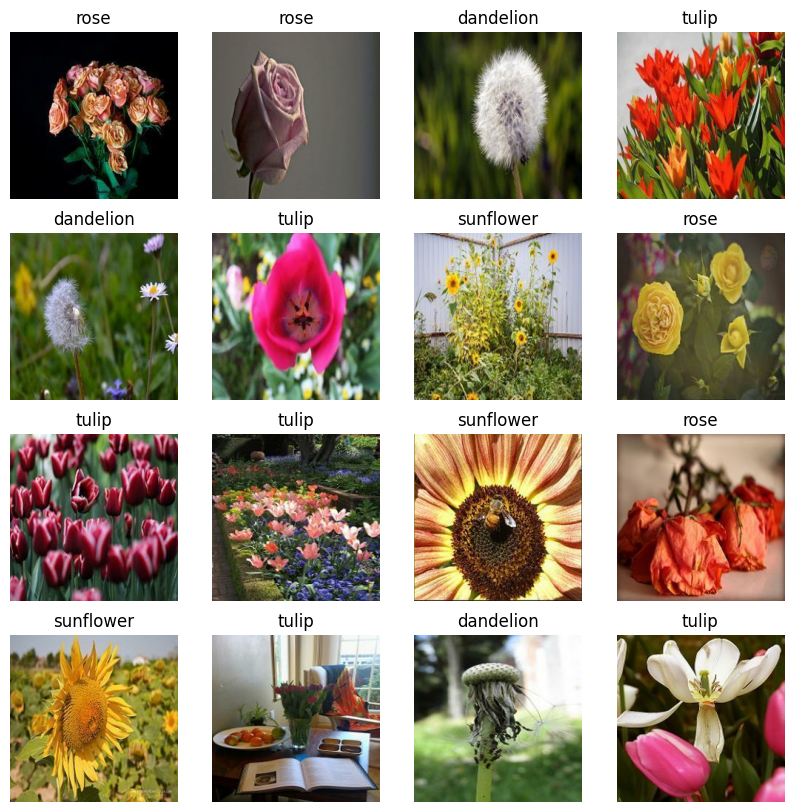

In [3]:

DATA_DIR = Path('../dl-assignment/data/flowers').with_suffix('')
WEIGHTS_PATH = Path('../dl-assignment/weights') # Path to the weights (For transfer learning)
CHECKPOINT_PATH = Path('../dl-assignment/weights/')

IMG_HEIGHT = 227 
IMG_WIDTH = 227
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2 # 20% of the data is used for validation (10 % will go to testing)
RANDOM_SEED = 137
TARGET_SIZE = (IMG_WIDTH, IMG_HEIGHT)

# Network parameters (Hyper)
LEARNING_RATE = 0.01
NUM_EPOCHS = 80


NUM_CLASSES = 5 # 5 classes in the dataset
# DROPOUT_RATE = 0.5 # How many neurons to drop in each layer


def get_separator():
    """ Returns a separator """
    print("======================================================")


def check_data():
    """How many images are in each folder"""
    pass


def augment_data():
    """Augment the data to create more data by balancing the dataset"""
    pass


def split_data():
    """Split the data into train and val split and get labels for each class
    Returns train_list, test_list (list of images) """

    train_split = tf.keras.utils.image_dataset_from_directory(
        DATA_DIR,
        validation_split=VALIDATION_SPLIT,
        subset="training",
        seed=RANDOMSEED,
        image_size=TARGET_SIZE,
        batch_size=BATCH_SIZE,
    )

    val_split = tf.keras.utils.image_dataset_from_directory(
        DATA_DIR,
        validation_split=VALIDATION_SPLIT, # 10 % of the data is used for validation
        subset='validation',
        seed=RANDOM_SEED,
        image_size=TARGET_SIZE,
        batch_size=BATCH_SIZE,
    )

    # Splitting the validation data into test and validation from val_split (10% each)
    test_split_size = len(val_split) // 2
    val_split_size = len(val_split) // 2

    test_split = val_split.take(test_split_size)
    val_split = val_split.skip(test_split_size)

    get_separator()
    print(f"After splitting test_split contains: {test_split_size} objects (400 images) for test")
    print(f"After splitting val_split contains: {val_split_size} objects (400 images) for validation")
    get_separator()


    class_names = train_split.class_names
    print(F"Classes in the dataset are: {class_names}")
    
    return train_split, test_split, val_split, class_names

train_split, test_split, val_split, class_names = split_data()  # Accessing the data outside my function


def visualize_data(train_split):
    """" Visualizing the 20 images from one of the splits and output the dimensions of the images """
    plt.figure(figsize=(10, 10))
    for images, labels in train_split.take(2): # Takes two which means it takes the first 16*2 images (batch size)
        for i in range(16):
            ax = plt.subplot(4, 4, i + 1)
            plt.imshow(images[i].numpy().astype("int"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

    for image_batch, labels_batch in train_split:
        get_separator()
        print(f"Dimensions for each image batch is: {image_batch.shape}")
        print(f"Label batch size corresponding to each object: {labels_batch.shape}")
        break
        # TODO:  Investigate if you can do the numpy squeeze to convert the tensor to a numpy array
        # TODO: https://stackoverflow.com/questions/50897557/how-can-i-view-tensor-as-an-image
    plt.show()



visualize_data(train_split)

Normalization (min-max feature scaling)
###  $X' = \frac{X-X_{\min}}{X_{max}-X_{min}}$

In [4]:
# TODO: Might need to rescale the pixel values to [-1 , 1] if using alexnet depending on its activation function


def normalize_data(train_split, test_split, val_split):
    """ Normalize the data with tensorflow by dividing each pixel by 255 (max value of a pixel)
    Returns normalized train and validation split rescaled """
    norm_train_split = train_split.map(lambda x, y: (x / 255, y))
    norm_test_split = test_split.map(lambda x, y: (x / 255, y))
    norm_val_split = val_split.map(lambda x, y: (x / 255, y))

    # Looping through (once) the normalized dataset to see if it is normalized for both train and validation split
    for img_,  labels_ in norm_train_split:
        break
    
    for img__, labels__ in norm_test_split:
        break

    for img___, labels___ in norm_val_split:
        break

     # First image in the first batch
    first_imgTRAIN = img_[0] 
    first_imgTEST = img__[0] 
    first_imgVAL = img___[0]

    print(f"After applying Normalization the pixel values of the first train img is: {np.min(first_imgTRAIN), np.max(first_imgTRAIN)}")
    print(f"After applying Normalization the pixel values of the first test img is: {np.min(first_imgTEST), np.max(first_imgTEST)}")
    print(f"After applying Normalization the pixel values of the first validation img is: {np.min(first_imgVAL), np.max(first_imgVAL)}")


    return norm_train_split, norm_test_split, norm_val_split



norm_train_split, norm_test_split, norm_val_split = normalize_data(train_split, test_split, val_split)

get_separator()
# -> returns None in shape to indicate that the batch size can be any size  
print(f"Normalized Train Split Shape: {norm_train_split.element_spec}")
print(f"Normalized Test Split Shape: {norm_test_split.element_spec}")
print(f"Normalized Validation Split Shape: {norm_val_split.element_spec}") 


get_separator()
# Gives me the amount of tensors stored as a list in both datasets (train and validation)
print(f"Amount of tensors in train set: {len(list(norm_train_split))}")  
print(f"Amount of tensors in test set: {len(list(norm_test_split))}")  
print(f"Amount of tensors in validation set: {len(list(norm_val_split))}")

After applying Normalization the pixel values of the first train img is: (0.0, 0.96862745)
After applying Normalization the pixel values of the first test img is: (0.0, 1.0)
After applying Normalization the pixel values of the first validation img is: (0.0, 1.0)
Normalized Train Split Shape: (TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Normalized Test Split Shape: (TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Normalized Validation Split Shape: (TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Amount of tensors in train set: 26
Amount of tensors in test set: 3
Amount of tensors in validation set: 4


# Designing CNN
* TODO: Insert Picture on the CNN architechture
* TODO: insert a picture on AlexNET and how many parameters it will have in its output (This to compare what happens if we use dilation instead and how we can remove a lot of parameters but still keep the image resolution higher )

CNNs suffer from the information loss caused by the pooling layers. This + too many parameters generated of the fully connected layer explodes the memory usage.


In [5]:
# model = Sequential([

# model.add(Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
# model.add(Conv2D(96, kernel_size=(11, 11), dilation_rate=(4, 4), activation='relu', padding="same"))
# model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
# model.add(Conv2D(256, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same"))
# model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
# model.add(Conv2D(384, kernel_size=(5, 5), dilation_rate=(2, 2), activation='relu', padding="same"))
# model.add(Conv2D(384, kernel_size=(5, 5), dilation_rate=(2, 2), activation='relu', padding="same"))
# model.add(Conv2D(256, kernel_size=(5, 5), dilation_rate=(2, 2), activation='relu', padding="same"))
# model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(NUM_CLASSES, activation='softmax'))
# ])

In [6]:
# Train and store the model
import datetime

# root_logdir = Path. / "logs"
# def get_run(custom_text="", root_logdir="logs"):
        
#         formatted_time = strftime("run_%Y_%m_%d_%H_%M_%S")
#     if custom_text:
#         custom_text = "_" + custom_text

#     return Path(root_logdir) / (formatted_time + custom_text)

# run_logdir = get_run_logdir("added_3_conv_layers")

# tensorboard_cb = TensorBoard(run_logdir, profile_batch=(100, 200))  


    
    




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 96)        1115232   
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       2

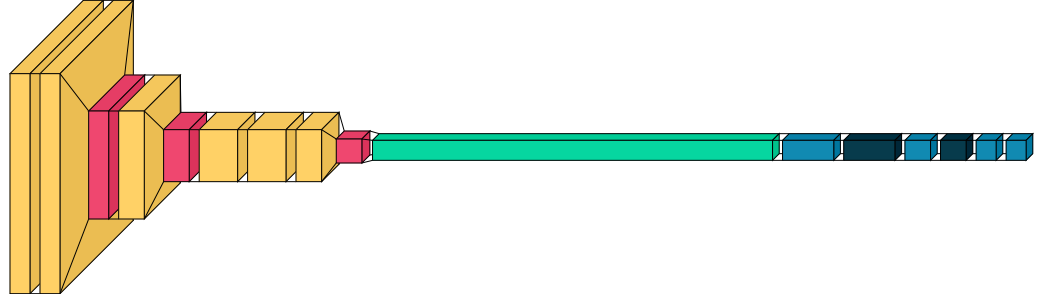

In [7]:
def create_cnn(NUM_CLASSES, WEIGHTS_PATH):
    """ 
    This Function builds and compiles CNN model using keras.

    ARGS:
    - num_classes: Number of classes in the dataset
    - weights_path: Path to the weights of the model (transfer learning)

    RETURNS:
    - model: Compiled keras modeL
    """
    
    # initialize the model
    model = Sequential()

    model.add(Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
    model.add(Conv2D(96, kernel_size=(11, 11), dilation_rate=(4, 4), activation='relu', padding="same"))
    model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
    model.add(Conv2D(256, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same"))
    model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
    model.add(Conv2D(384, kernel_size=(5, 5), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(384, kernel_size=(5, 5), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(256, kernel_size=(5, 5), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # TODO: COMMENT THIS
        metrics=['accuracy']
    )

    # if WEIGHTS_PATH.exists():
    #     model.load_weights(WEIGHTS_PATH)
    
    model.add(Dense(5, activation='softmax'))

    model.compile(
        optimizer= Adam(learning_rate=LEARNING_RATE),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Print model summary
    model.summary()

    return model

model = create_cnn(NUM_CLASSES, WEIGHTS_PATH)
visualkeras.layered_view(model)





In [8]:
if tf.config.list_physical_devices('GPU'):
    print("GPU is available and will be used for training.")
else:
    print("No GPU detected. Training will be done on CPU, THIS WILL SUCK!")


No GPU detected. Training will be done on CPU, THIS WILL SUCK!


In [9]:
# stopping = EarlyStopping(monitor="accuracy") # Comment and do this more advanced later

AUTOTUNE = tf.data.experimental.AUTOTUNE #  optimize the data loading

norm_train_split = norm_train_split.cache().prefetch(buffer_size=AUTOTUNE)
norm_val_split = norm_val_split.cache().prefetch(buffer_size=AUTOTUNE)

model.fit(
    norm_train_split,
    epochs=NUM_EPOCHS,
    validation_data=norm_val_split,
    # callbacks=[stopping],
)

model.save_weights("model.h5")
# Saving only the weights in the folder
model.save_weights("weights.h5")

# saving architecture, to json
json_string = model.to_json()

with open("nn_architecture", "w") as f:
    f.write(json_string)

Epoch 1/80


26/26 [==============================] - 821s 31s/step - loss: 1.6286 - accuracy: 0.2223 - val_loss: 1.5986 - val_accuracy: 0.2477
Epoch 2/80
26/26 [==============================] - 811s 31s/step - loss: 1.6064 - accuracy: 0.2451 - val_loss: 1.5966 - val_accuracy: 0.2477
Epoch 3/80
26/26 [==============================] - 805s 31s/step - loss: 1.6009 - accuracy: 0.2503 - val_loss: 1.5958 - val_accuracy: 0.2477
Epoch 4/80
26/26 [==============================] - 806s 31s/step - loss: 1.6010 - accuracy: 0.2497 - val_loss: 1.5962 - val_accuracy: 0.2477
Epoch 5/80
26/26 [==============================] - 800s 31s/step - loss: 1.6010 - accuracy: 0.2497 - val_loss: 1.5961 - val_accuracy: 0.2477
Epoch 6/80
26/26 [==============================] - 795s 31s/step - loss: 1.6012 - accuracy: 0.2500 - val_loss: 1.5962 - val_accuracy: 0.2477
Epoch 7/80
26/26 [==============================] - 793s 31s/step - loss: 1.6055 - accuracy: 0.2438 - val_loss: 1.5965 - val_accuracy: 0.2477
Epoch 8/80
26/26 

In [20]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.628618,0.222325,1.598594,0.247664
1,1.606359,0.245080,1.596643,0.247664
2,1.600866,0.250308,1.595822,0.247664
3,1.601020,0.249692,1.596244,0.247664
4,1.600989,0.249692,1.596146,0.247664


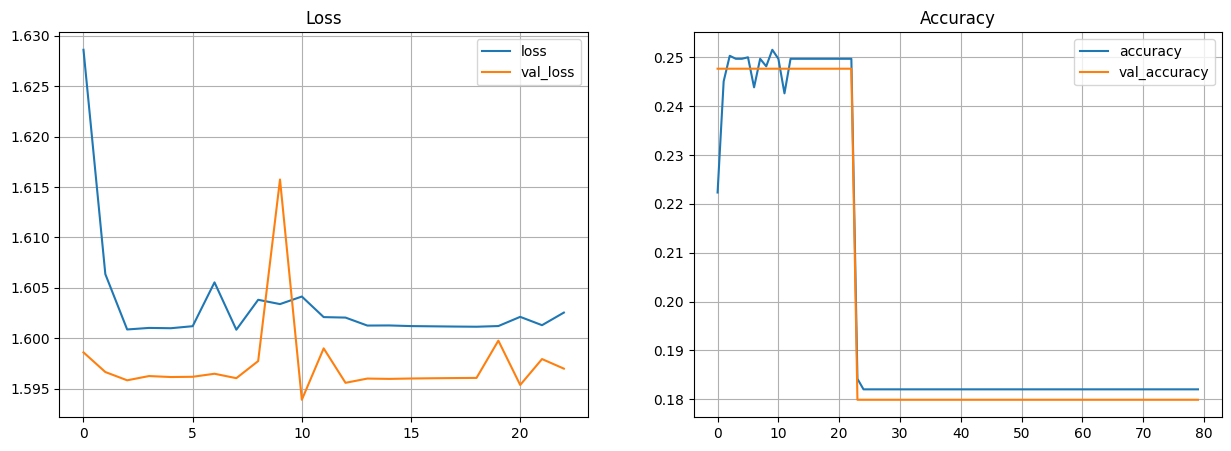

In [23]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1, 2, figsize=(15, 5))
    metrics[['loss', 'val_loss']].plot(ax=ax[0], title= 'Loss', grid=True)
    metrics[['accuracy', 'val_accuracy']].plot(ax=ax[1], title= 'Accuracy', grid=True) 

plot_metrics(metrics)

In [ ]:
# def trainModel(model):
#     """This script trains the model and stores it in the weights folder, stores callbacks for visualization with tensorboard"""

#     model = createCNN()

#     log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#     tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#     model.fit(
#         norm_train_split,
#         validation_data=norm_val_split,
#         epochs=NUM_EPOCHS,
#         callbacks=[tensorboard_callback]
#     )

# trainModel(model)


TypeError: createCNN() missing 2 required positional arguments: 'NUM_CLASSES' and 'WEIGHTS_PATH'

In [ ]:


# %tensorboard --logdir logs/fit


UsageError: Line magic function `%tensorboard` not found.


# Image of my CNN.

## Training the model

In [ ]:
# # Create a checkpoint callback to save the weights after each epoch


# def saveWeights(CHECKPOINT_PATH):
#     """ This saves the weights in ../dl-assignment/weights/ """

#     checkpoint_dir = os.path.dirname(CHECKPOINT_PATH)
    
#     cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,
#                                                     monitor='val_loss'
#                                                     save_weights_only=True,
#                                                     verbose=1)
#     return cp_callback

In [ ]:
# model.fit(
#   train_split,
#   validation_data=val_split,
#   epochs=NUM_EPOCHS,
#   callbacks=[save_weights(checkpoint_path)]# This is for saving the weights
# )




In [ ]:
# def plotAccVSLoSS():
#     """ Plots the accuracy and val_loss of the model during training """

#     plt.figure(figsize=(10, 6))
#     plt.plot(model.history.history['accuracy'], label='accuracy', color='blue', label='Train Accuracy')
#     plt.plot(model.history.history['val_loss'], label='val_loss', color='red', label='Val loss') 
#     plt.legend()
#     plt.title('Accuracy vs val_Loss during epochs')
#     plt.show()

#     plotAccuracy()


# def plotAccuracy():
#     """ Plots the accuracy and val of the model during training """
#     plt.figure(figsize=(10, 6))
#     plt.plot(model.history.history['accuracy'], label='accuracy', color='blue', label='Train Accuracy')
#     plt.plot(model.history.history['val_accuracy'], label='val_accuracy', color='red', label='Val loss') 
#     pass

In [ ]:
# model.fit(
#   train_split,
#   validation_data=val_split,
#   epochs=NUM_EPOCHS
# )

In [ ]:
# # Train the model on the data

# def trainModel(model, train_split, val_split, NUM_EPOCHS):
#     """" 
#     Trains the model on the data and returns the model with the weights

#     """
#     model.fit(
#         train_split,
#         validation_data=val_split,
#         epochs=NUM_EPOCHS
#     )
    
    
#     return model

# trainModel(model, train_split, val_split)

In [ ]:

# ## THIS IS WITH COMMENTS 
# def ConvCNN(NUM_CLASSES, WEIGHTS_PATH):
#     """ Inputs for the model 
#     - num_classes: Number of classes in the dataset
#     - weights_path: Path to the weights of the model (transfer learning)
#     """
    
#     # initialize the model
#     model = Sequential()
    
#     # 1st and 2nd layer(dilated but the same size as first layer)
#         # start 227x227x3
#     model.add(Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
#         # Out -> 55x55x96
#     model.add(Conv2D(96, kernel_size=(11, 11), dilation_rate=(4, 4), activation='relu', padding="same"))
#         # In 55x55x96 -> Out 55x55x96 (dilated for crude general shapes early in the network without losing spatial dimensions and significant compute)
#     # ------------- Down Sizing image by 2 ----------------
#     model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
#         # Out -> 27x27x96
#     # 3rd layer
#     model.add(Conv2D(256, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same"))
#         # In 27x27x96 -> Out 27x27x256
    
#     # ----------- Down Sizing image by 2 ------------------
#     model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
#         # Out -> 13x13x256
#     # 4th layer
#     model.add(Conv2D(384, kernel_size=(5, 5), dilation_rate=(2, 2), activation='relu', padding="same"))
#         # In 13x13x256 ->  Out 13x13x384
#     # 5th layer
#     model.add(Conv2D(384, kernel_size=(5, 5), dilation_rate=(2, 2), activation='relu', padding="same"))
#         # In 13x13x384 -> Out 13x13x384
#     # 6th layer
#     model.add(Conv2D(256, kernel_size=(5, 5), dilation_rate=(2, 2), activation='relu', padding="same"))
#         # In 13x13x384 Out 13x13x256

#     # ----------- Down Sizing image by 2 ------------------
#     model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
#         # Out -> 6x6x256
    
#     model.add(Flatten())
#         # In 6x6x256 -> Out 1D array with 9216 elements


#     # Dense Layer 1
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.5)) # for regularization, this drops 50% of the neurons and reduced overfitting
#         # Out -> 1D array with 512 elements and after 50% dropout = 256 neurons

#     # Dense Layer 2
#     model.add(Dense(256, activation='relu'))
#     model.add(Dropout(0.5)) # for regularization, this drops 50% of the neurons and reduced overfitting
#         # Out -> 1D array with 512 neurons and after 50% dropout = 256 neurons

#     # Dense Layer 3
#     model.add(Dense(NUM_CLASSES, activation='softmax'))
#         # Out -> 1D array with 5 neurons (5 classes)


#     # Total Expected parameters is 15.275.493

#     model.compile(
#         optimizer='adam',
#         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # TODO: COMMENT THIS
#         metrics=['accuracy']
#     )
    
#     model.add(Dense(5, activation='softmax'))
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     model.summary()



# ----------------------------
# # Original Alexnet
#     # Start 227x227x3
#     model.add(Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
#     # -> 55x55x96
#     model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
#     # -> 27x27x96
#     model.add(Conv2D(256, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same"))
#     # -> 27x27x256 

    # model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
    # # -> 13x13x256
    # model.add(Conv2D(384, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same"))
    # # -> 13x13x384
    # model.add(Conv2D(384, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same"))
    # # -> 13x13x384
    # model.add(Conv2D(256, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same"))
    # # -> 13x13x256
    # model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))
    # # -> 6x6x256
    # model.add(Flatten())


    # model.add(Dense(4096, activation='relu'))
    # model.add(Dropout(0.5)) # for regularization, this drops 50% of the neurons

    # model.add(Dense(4096, activation='relu'))
    # model.add(Dropout(0.5)) # for regularization, this drops 50% of the neurons
# --------------------------------------

In [ ]:
""" 
TODO: 

Step 1.5 Fix what type of data will be in the splits.. (This is just classes so it should be categorical perhaps?) 

Step 2. Neural network construction with the layers
    - Alexnet is trained for a lot of classes but we only need to use it for 5 classes (5 neurons in the last layer(?)) 
    - This would mean we could optimize the model by cutting of some layers or something
Step 3. Compile the model (optimizer, loss function, metrics)
Step 4. Train the model (model.fit())
    - Investigate early stopping and double descent(?)
    - Have metrics that track the val loss and training accuracy during training (Would be nice to have it visually)
Step 5. Save the model (model.save()) (save the model and the weights)
Step 6. Make predictions (model.predict())
Step 7. Evaluate the model (model.evaluate()) (confusion matrix, accuracy etc)
Step 8. Visualize the results (plotting the results) (plotting the loss and accuracy)
"""

In [ ]:
""" This is the part of the code where model build is constructed and also trained. 
Will need to follow the workflow how to create it.

Step 1. Standardize the data (normalize the data) (divide by 255) (this is done in the model.fit() function) DONE


Step 1.5 Fix what type of data will be in the splits.. (This is just classes so it should be categorical perhaps?) 
Step 2. Neural network construction with the layers
    - Alexnet is trained for a lot of classes but we only need to use it for 5 classes (5 neurons in the last layer(?)) 
    - This would mean we could optimize the model by cutting of some layers or something
Step 3. Compile the model (optimizer, loss function, metrics)
Step 4. Train the model (model.fit())
    - Investigate early stopping and double descent(?)
    - Have metrics that track the val loss and training accuracy during training (Would be nice to have it visually)

    # TODO: Make the model run faster with prefetch caching??
    # TODO: Investigate tensorboard more if visualization fucks up. 
    # TODO: Overfitt model (e.g ) let it run its course without stopping
Step 5. Save the model (model.save()) (save the model and the weights)
Step 6. Make predictions (model.predict())
Step 7. Evaluate the model (model.evaluate()) (confusion matrix, accuracy etc)
Step 8. Visualize the results (plotting the results) (plotting the loss and accuracy)

"""






